# Testing the Integrated Simulation Platform
This notebook contains codes to test the various functionalities of the integrated simulation platform. You can call any of the modules from the package here. 

In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import re

import dreaminsg_integrated_model.network_sim_models.interdependencies as dependencies
import dreaminsg_integrated_model.network_sim_models.water.water_network_model as water
import dreaminsg_integrated_model.network_sim_models.power.power_system_model as power
import dreaminsg_integrated_model.network_sim_models.transportation.network as transpo

import dreaminsg_integrated_model.results.figures.plots as plots

In [3]:
MAIN_DIR = Path('..')
ABS_MAIN_DIR = os.path.abspath('..')

In [4]:
#load water_network model
water_folder = MAIN_DIR/'dreaminsg_integrated_model/data/networks/water'
wn = water.load_water_network(water_folder/'Example_water.inp')

Water network successfully loaded from ..\dreaminsg_integrated_model\data\networks\water\Example_water.inp. The analysis type is set to Pressure De[endent Demand Analysis.


In [5]:
#load power systems network
power_folder = MAIN_DIR/'dreaminsg_integrated_model/data/networks/power'
pn = power.load_power_network(power_folder/'Example_power.json')

Power system successfully loaded from ..\dreaminsg_integrated_model\data\networks\power\Example_power.json


In [8]:
#load dynamic traffic assignment model
transp_folder = MAIN_DIR/'dreaminsg_integrated_model/data/networks/transportation/Example1'
tn = transpo.Network(
    "{}/example_net.tntp".format(transp_folder), 
    "{}/example_trips.tntp".format(transp_folder),
     "{}/example_node.tntp".format(transp_folder))
#tn.userEquilibrium("FW", 400, 1e-4, tn.averageExcessCost)

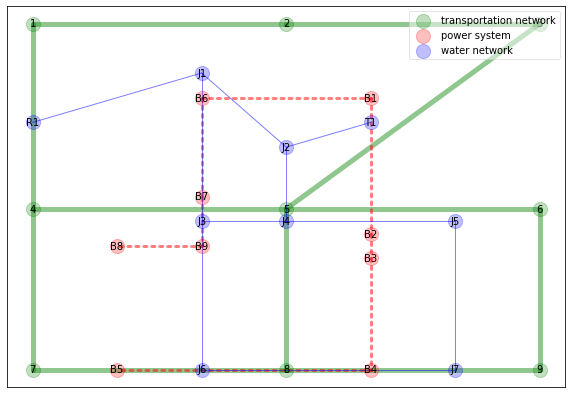

In [19]:
integrated_graph = plots.plot_integrated_network(pn, wn, tn)

In [36]:
net1_deps = DependencyTable()
net1_deps.add_pump_motor_coupling(water_id='WP1', power_id='MP1', motor_mw=pn.motor.pn_mech_mw[pn.motor.name == 'MP1'].values[0], pm_efficiency=1.0)
net1_deps.add_gen_reserv_coupling(water_id='R1', power_id='G3', gen_mw=1, gr_efficiency=1.0)
net1_deps.add_gen_reserv_coupling(water_id='R1', power_id='G3', gen_mw=1, gr_efficiency=1.0)

net1_deps.wp_table

,water_id,power_id,water_type,power_type
0,WP1,MP1,Pump,Motor
1,R1,G3,Reservoir,Generator
2,R1,G3,Reservoir,Generator


In [37]:
net1_deps.add_transpo_access(integrated_graph)
net1_deps.access_table

,origin_id,transp_id,origin_cat,origin_type,access_dist
0,B8,4,power,Bus,125.00
1,B7,5,power,Bus,103.08
2,B5,7,power,Bus,100.00
3,B4,8,power,Bus,100.00
4,B6,2,power,Bus,180.28
5,B2,5,power,Bus,111.80
6,B3,5,power,Bus,141.42
7,B1,2,power,Bus,180.28
8,B9,5,power,Bus,125.00
9,J1,2,water,Juntion,141.42
